In [38]:
# Cell 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [39]:
# Cell 2: Load Data

df = pd.read_csv('medicines_usage.csv')
print(f"Dataset loaded with shape: {df.shape}")
print(df.info())
print(df.head())

C:\Users\nst\AppData\Local\Temp\ipykernel_12196\1708644940.py:3: DtypeWarning: Columns (42,43,44,45,46,47,48) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('medicines_usage.csv')


Dataset loaded with shape: (248218, 58)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248218 entries, 0 to 248217
Data columns (total 58 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   id                 248218 non-null  int64 
 1   name               248218 non-null  object
 2   substitute0        238621 non-null  object
 3   substitute1        233867 non-null  object
 4   substitute2        230233 non-null  object
 5   substitute3        226856 non-null  object
 6   substitute4        223962 non-null  object
 7   sideEffect0        248218 non-null  object
 8   sideEffect1        238416 non-null  object
 9   sideEffect2        229500 non-null  object
 10  sideEffect3        207638 non-null  object
 11  sideEffect4        163560 non-null  object
 12  sideEffect5        131258 non-null  object
 13  sideEffect6        91857 non-null   object
 14  sideEffect7        67750 non-null   object
 15  sideEffect8        48506 non

In [40]:
# Cell 3: Data Cleaning
print("Checking for missing values...")
print(df.isnull().sum())

# Filling missing values with "Unknown"
df.fillna("Unknown", inplace=True)

# Dropping duplicates
df.drop_duplicates(inplace=True)

# Standardizing string data for uniformity
str_columns = df.select_dtypes(include='object').columns
for col in str_columns:
    df[col] = df[col].str.lower().str.strip()

print(f"After cleaning, dataset shape: {df.shape}")

# Display the first few rows of the cleaned dataset
print(df.isnull().sum())


Checking for missing values...
id                        0
name                      0
substitute0            9597
substitute1           14351
substitute2           17985
substitute3           21362
substitute4           24256
sideEffect0               0
sideEffect1            9802
sideEffect2           18718
sideEffect3           40580
sideEffect4           84658
sideEffect5          116960
sideEffect6          156361
sideEffect7          180468
sideEffect8          199712
sideEffect9          210510
sideEffect10         220944
sideEffect11         227887
sideEffect12         231936
sideEffect13         233491
sideEffect14         237799
sideEffect15         240537
sideEffect16         242209
sideEffect17         242836
sideEffect18         243703
sideEffect19         244272
sideEffect20         244995
sideEffect21         245093
sideEffect22         245170
sideEffect23         245313
sideEffect24         245495
sideEffect25         246715
sideEffect26         246715
sideEffect27     

In [41]:
# Cell 4: Feature Engineering
# Creates new features like aggregated substitutes and side effects.

# Combine side effects into a single column
side_effect_cols = [col for col in df.columns if 'sideEffect' in col]
df['all_sideeffects'] = df[side_effect_cols].apply(
    lambda row: sorted(row.values), axis=1)

# Combine substitutes into a single column
substitute_cols = [col for col in df.columns if 'substitute' in col]
df['all_substitutes'] = df[substitute_cols].apply(
    lambda row: sorted(row.values), axis=1)

df.describe




<bound method NDFrame.describe of             id                                  name  \
0            1              augmentin 625 duo tablet   
1            2                   azithral 500 tablet   
2            3                      ascoril ls syrup   
3            4                  allegra 120mg tablet   
4            5                        avil 25 tablet   
...        ...                                   ...   
248213  248214  zestrain 100mg/325mg/250mg tablet mr   
248214  248215              zoxinace 200mg tablet sr   
248215  248216                     zivex 25mg tablet   
248216  248217               zi fast 500mg injection   
248217  248218             zyvocol 1% dusting powder   

                                substitute0             substitute1  \
0            penciclav 500 mg/125 mg tablet  moxikind-cv 625 tablet   
1                   zithrocare 500mg tablet         azax 500 tablet   
2                           solvin ls syrup       ambrodil-lx syrup   
3        

In [42]:

# Cell 5: Data Analysis
def analyze_data(df):
    """
    Analyzes the data, including substitute and side effect counts.
    """
    # Top substitutes
    substitute_counts = df['all_substitutes'].value_counts().head(10)
    print("Top substitutes:")
    print(substitute_counts)
    
    # Most common side effects
    side_effect_counts = df['all_sideeffects'].value_counts().head(10)
    print("\nMost common side effects:")
    print(side_effect_counts)

# Analyze the dataset
analyze_data(df)



Top substitutes:
all_substitutes
[unknown, unknown, unknown, unknown, unknown]                                                                                                                                9597
[lecope-m tablet, levocet m tablet, monticope tablet, montina-l tablet, solitair tablet]                                                                                     1594
[oflamed 200 tablet, oflotas 200mg tablet, olox 200mg tablet, oxa 200mg tablet, zenflox 200 tablet]                                                                          1422
[bigcef 500 tablet, cefakind 500 tablet, cefoxim 500 tablet, pulmocef 500 tablet, zefu 500 tablet]                                                                           1167
[acimol 100 mg/325 mg tablet, arflur-p tablet, ark-ap tablet, dolostat pc 100 mg/325 mg tablet, topnac p tablet]                                                             1145
[cefaxone 1gm injection, ceftrax 1000mg injection, ritecef 1000mg injection, 


Therapeutic class distribution:
Therapeutic Class
anti infectives                57503
gastro intestinal              33630
pain analgesics                32267
neuro cns                      23319
respiratory                    23052
cardiac                        18381
anti diabetic                  11679
ophthal                        10573
derma                           9883
hormones                        5629
gynaecological                  4406
vitamins minerals nutrients     4216
anti neoplastics                3513
blood related                   2659
urology                         1844
ophthal otologicals             1725
anti malarials                  1679
sex stimulants rejuvenators      723
otologicals                      485
others                           481
vaccines                         329
stomatologicals                  173
unknown                           69
Name: count, dtype: int64

Habit forming counts:
Habit Forming
no     242215
yes      6003
Name: c

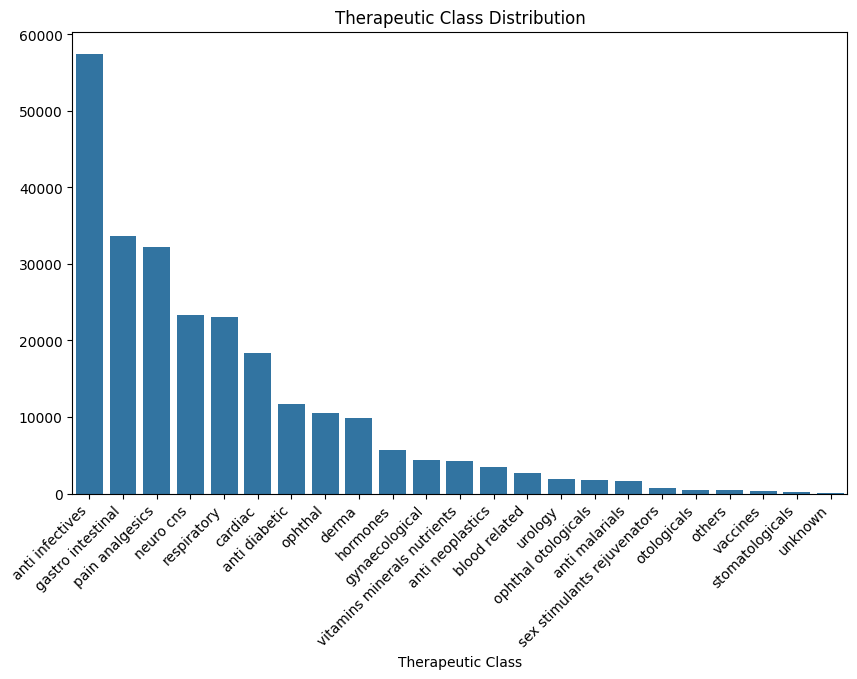

In [43]:
# Cell 6: Classification Analysis

"""
Groups data by classification categories for insights.
"""
therapeutic_counts = df['Therapeutic Class'].value_counts()
habit_forming_counts = df['Habit Forming'].value_counts()

print("\nTherapeutic class distribution:")
print(therapeutic_counts)

print("\nHabit forming counts:")
print(habit_forming_counts)

# Plot therapeutic class distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=therapeutic_counts.index, y=therapeutic_counts.values)
plt.xticks(rotation=45, ha='right')
plt.title('Therapeutic Class Distribution')
plt.show()



In [44]:
fig = px.pie(df_med['type'].value_counts().reset_index().rename(columns={'index':'Type', 'type':'count'}), values='count', names='Type', title='Medicine Types')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()
printmd("#### Huge gap between allopathic and herbal medicines")

NameError: name 'px' is not defined

In [ ]:
# Cell 7: Advanced Modeling 
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report



In [ ]:
# Cell 7: Advanced Modeling

"""
Builds a machine learning model to predict therapeutic class.
"""
# Select features and target
X = df['name']  # Example: using only names; expand with other features
y = df['Therapeutic Class']

# Text vectorization
vectorizer = TfidfVectorizer(max_features=1000)
X_vec = vectorizer.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X_vec, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))





Classification Report:


c:\Users\nst\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\nst\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


                             precision    recall  f1-score   support

              anti diabetic       0.81      0.68      0.74      2313
            anti infectives       0.76      0.90      0.82     11430
             anti malarials       0.75      0.57      0.65       337
           anti neoplastics       0.49      0.12      0.19       655
              blood related       0.61      0.32      0.42       527
                    cardiac       0.62      0.54      0.58      3686
                      derma       0.81      0.91      0.86      2034
          gastro intestinal       0.71      0.72      0.71      6778
             gynaecological       0.69      0.38      0.49       896
                   hormones       0.62      0.67      0.65      1109
                  neuro cns       0.55      0.56      0.56      4676
                    ophthal       0.69      0.61      0.65      2152
        ophthal otologicals       0.65      0.23      0.34       369
                     others      

c:\Users\nst\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


C:\Users\nst\AppData\Local\Temp\ipykernel_12196\2408169479.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=side_effect_values, y=side_effect_names, palette="viridis")


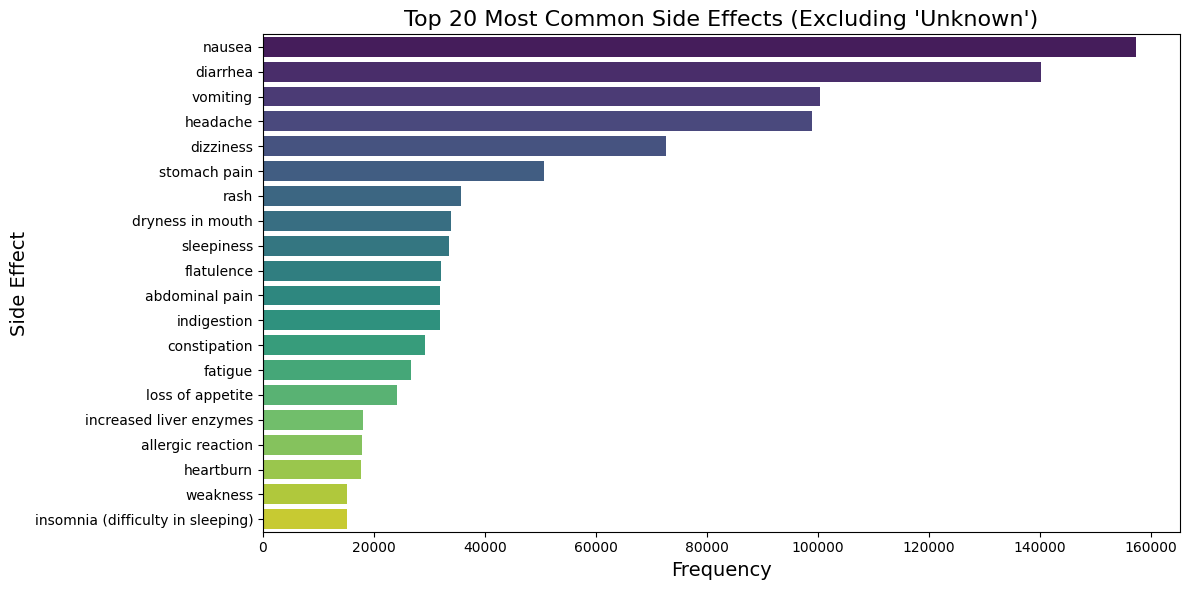

In [46]:
from collections import Counter

def plot_filtered_side_effects_histogram(df, top_n=20):
    """
    Plots a histogram of the most common side effects, excluding "unknown" values.
    
    Parameters:
        df (pd.DataFrame): DataFrame containing the 'all_sideeffects' column.
        top_n (int): Number of top side effects to display.
    """
    # Flatten the list of all side effects into a single list
    all_sideeffects_flat = [effect for sublist in df['all_sideeffects'] for effect in sublist if effect != "unknown"]
    
    # Count occurrences of each side effect
    side_effect_counts = Counter(all_sideeffects_flat)
    
    # Get the most common side effects
    most_common_sideeffects = side_effect_counts.most_common(top_n)
    side_effect_names, side_effect_values = zip(*most_common_sideeffects)
    
    # Plot the histogram
    plt.figure(figsize=(12, 6))
    sns.barplot(x=side_effect_values, y=side_effect_names, palette="viridis")
    plt.xlabel("Frequency", fontsize=14)
    plt.ylabel("Side Effect", fontsize=14)
    plt.title(f"Top {top_n} Most Common Side Effects (Excluding 'Unknown')", fontsize=16)
    plt.tight_layout()
    plt.show()

# Plot the histogram for top 20 side effects, excluding "unknown"
plot_filtered_side_effects_histogram(df, top_n=20)


In [48]:
#Recommended substitutes system
def alternatives_in_row_format(df):
    # Filter only the necessary columns for medicine names and substitutes
    substitute_cols = ['substitute0', 'substitute1', 'substitute2', 'substitute3', 'substitute4']
    cols = ['name'] + substitute_cols
    
    # Select relevant columns
    substitutes_df = df[cols].copy()
    
    # Exclude unknown substitutes
    for col in substitute_cols:
        substitutes_df[col] = substitutes_df[col].apply(lambda x: x if x != "unknown" else None)
    
    return substitutes_df

# Convert alternatives to row format
substitutes_row_format = alternatives_in_row_format(df)

# Display the first few rows
substitutes_row_format.head()


,name,substitute0,substitute1,substitute2,substitute3,substitute4
0,augmentin 625 duo tablet,penciclav 500 mg/125 mg tablet,moxikind-cv 625 tablet,moxiforce-cv 625 tablet,fightox 625 tablet,novamox cv 625mg tablet
1,azithral 500 tablet,zithrocare 500mg tablet,azax 500 tablet,zady 500 tablet,cazithro 500mg tablet,trulimax 500mg tablet
2,ascoril ls syrup,solvin ls syrup,ambrodil-lx syrup,zerotuss xp syrup,capex ls syrup,broxum ls syrup
3,allegra 120mg tablet,lcfex tablet,etofex 120mg tablet,nexofex 120mg tablet,fexise 120mg tablet,histafree 120 tablet
4,avil 25 tablet,eralet 25mg tablet,None,None,None,None


C:\Users\nst\AppData\Local\Temp\ipykernel_12196\2704186019.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=therapeutic_counts.index, y=therapeutic_counts.values, palette="Blues_d")


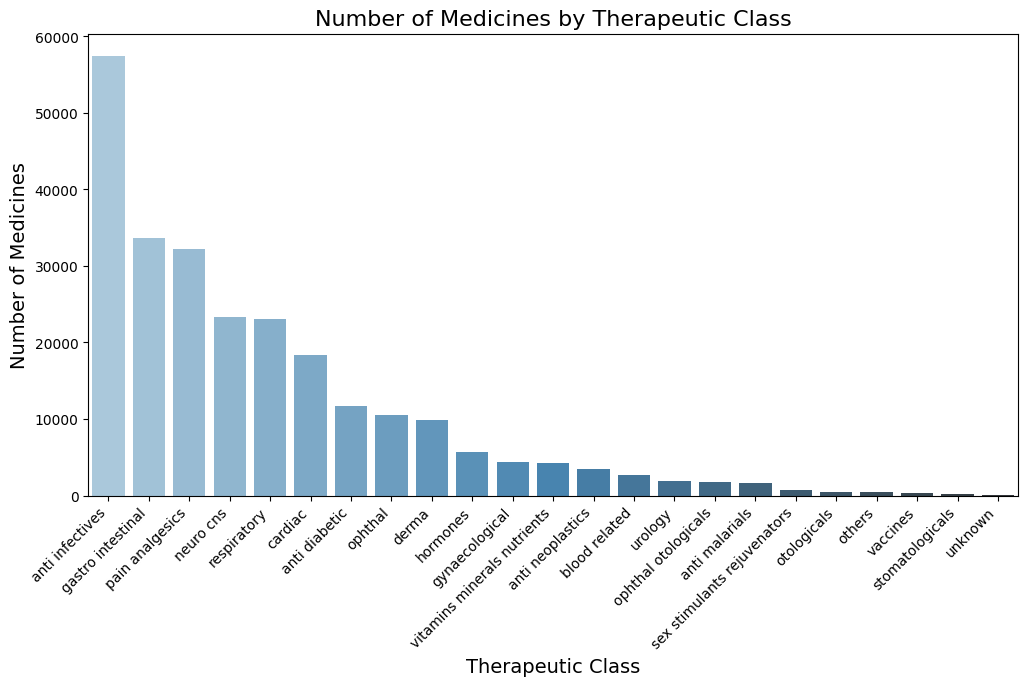

C:\Users\nst\AppData\Local\Temp\ipykernel_12196\2704186019.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=chemical_counts.index[:15], y=chemical_counts.values[:15], palette="Greens_d")


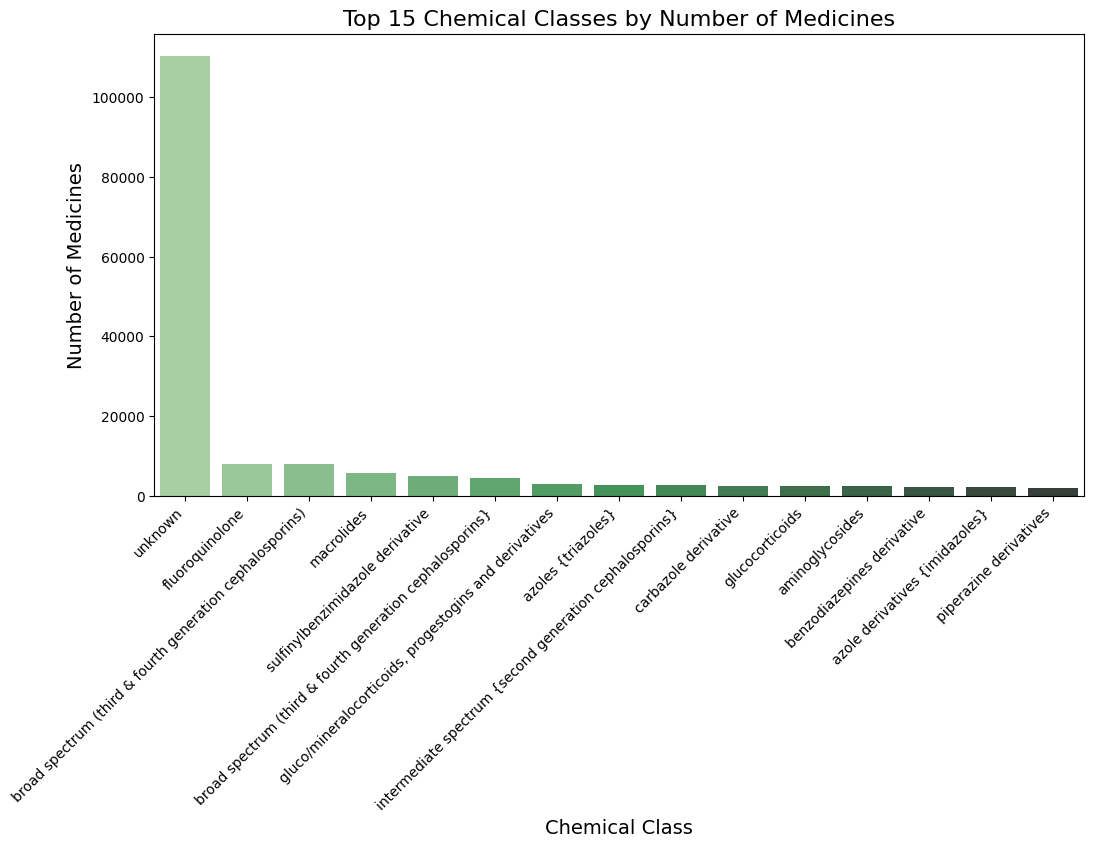

C:\Users\nst\AppData\Local\Temp\ipykernel_12196\2704186019.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=action_counts.index[:15], y=action_counts.values[:15], palette="Oranges_d")


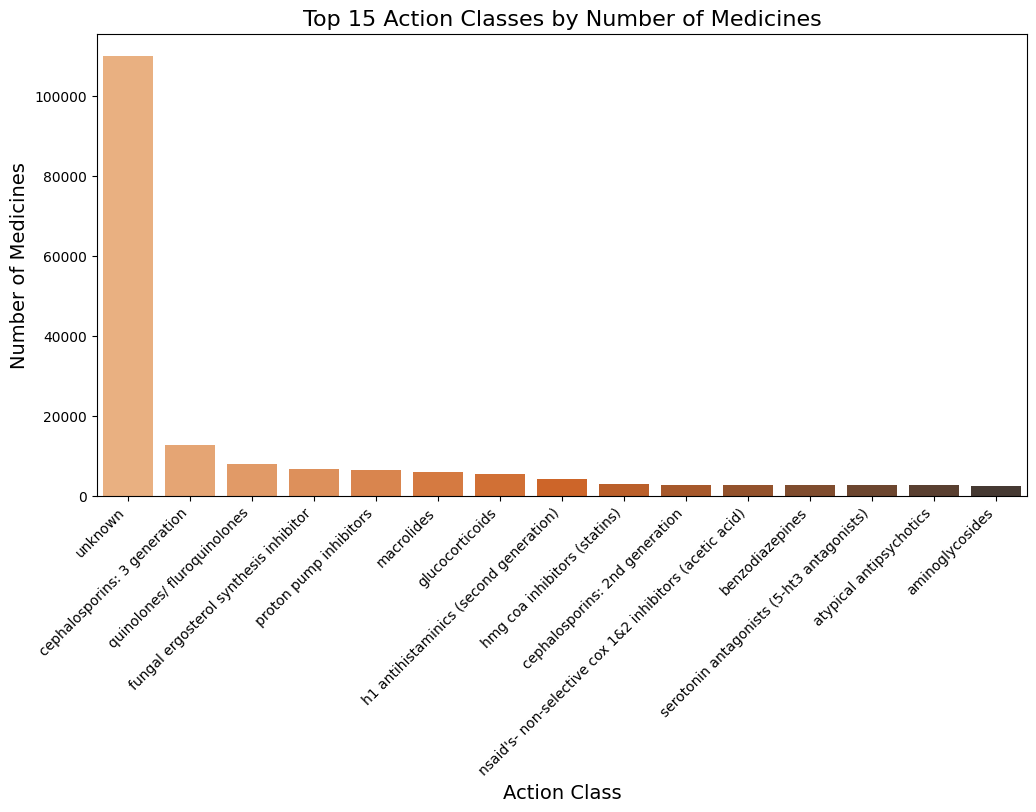

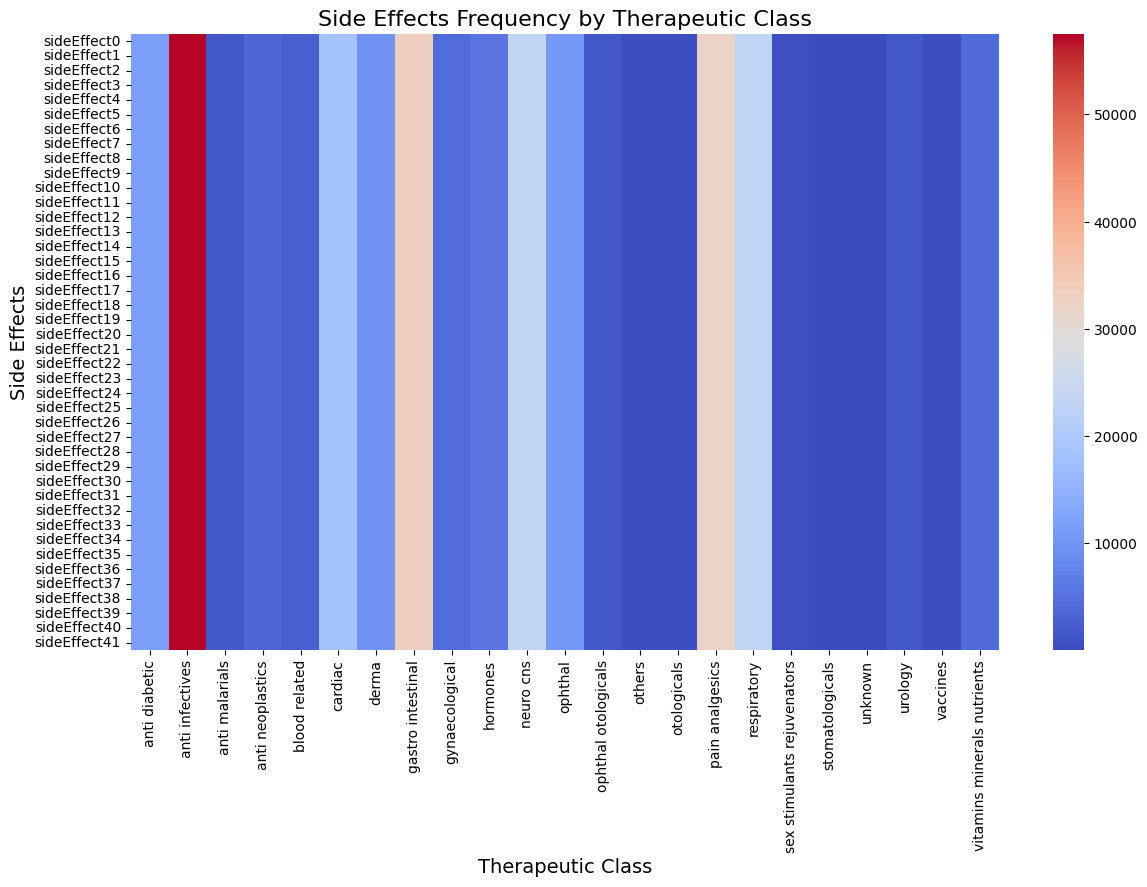

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

def visualize_class_variations(df):
    """
    Visualizes how side effects, substitutes, and other factors vary across different classes.
    
    Parameters:
        df (pd.DataFrame): DataFrame containing the dataset with relevant columns.
    """
    # Aggregation: Count the number of medicines in each class
    therapeutic_counts = df['Therapeutic Class'].value_counts()
    chemical_counts = df['Chemical Class'].value_counts()
    action_counts = df['Action Class'].value_counts()
    
    # Plot Therapeutic Class Distribution
    plt.figure(figsize=(12, 6))
    sns.barplot(x=therapeutic_counts.index, y=therapeutic_counts.values, palette="Blues_d")
    plt.xticks(rotation=45, ha='right')
    plt.title("Number of Medicines by Therapeutic Class", fontsize=16)
    plt.xlabel("Therapeutic Class", fontsize=14)
    plt.ylabel("Number of Medicines", fontsize=14)
    plt.show()
    
    # Plot Chemical Class Distribution
    plt.figure(figsize=(12, 6))
    sns.barplot(x=chemical_counts.index[:15], y=chemical_counts.values[:15], palette="Greens_d")
    plt.xticks(rotation=45, ha='right')
    plt.title("Top 15 Chemical Classes by Number of Medicines", fontsize=16)
    plt.xlabel("Chemical Class", fontsize=14)
    plt.ylabel("Number of Medicines", fontsize=14)
    plt.show()
    
    # Plot Action Class Distribution
    plt.figure(figsize=(12, 6))
    sns.barplot(x=action_counts.index[:15], y=action_counts.values[:15], palette="Oranges_d")
    plt.xticks(rotation=45, ha='right')
    plt.title("Top 15 Action Classes by Number of Medicines", fontsize=16)
    plt.xlabel("Action Class", fontsize=14)
    plt.ylabel("Number of Medicines", fontsize=14)
    plt.show()
    
    # Heatmap: Side Effects vs. Therapeutic Class
    side_effect_cols = [col for col in df.columns if 'sideEffect' in col]
    therapeutic_side_effects = df.groupby('Therapeutic Class')[side_effect_cols].apply(lambda x: x.notnull().sum())
    
    plt.figure(figsize=(14, 8))
    sns.heatmap(therapeutic_side_effects.T, cmap="coolwarm", annot=False, cbar=True)
    plt.title("Side Effects Frequency by Therapeutic Class", fontsize=16)
    plt.xlabel("Therapeutic Class", fontsize=14)
    plt.ylabel("Side Effects", fontsize=14)
    plt.show()

# Call the visualization function
visualize_class_variations(df)
